In [92]:
from google.colab import drive
drive.mount('/content/drive')

colabPath = 'drive/My Drive/Colab Notebooks/AIAP16/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
dataset_path = colabPath + "lung_cancer.db"

In [94]:
# import libraries
import sqlite3 as sq3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
# Connect to database
conn = sq3.Connection(dataset_path)

In [96]:
# Create query statement
query = """
SELECT *
FROM lung_cancer;
"""

In [97]:
# Load data into Dataframe and view first 5 rows of db
df = pd.read_sql(query, conn)
df.head()

,ID,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Last Weight,Current Weight,Start Smoking,Stop Smoking,Taken Bronchodilators,Frequency of Tiredness,Dominant Hand,Lung Cancer Occurrence
0,1.468154e+16,42,Male,No,Not Present,Medium,73,69,2015,2020,No,None / Low,Right,1
1,1.271684e+18,72,Male,Yes,Not Present,High,50,42,2006,2012,Yes,Medium,Right,1
2,1.708068e+18,65,Male,Yes,Not Present,Low,65,75,1998,Still Smoking,Yes,None / Low,Right,0
3,3.555829e+17,67,Male,No,Not Present,High,69,58,2011,2014,No,None / Low,Right,1
4,1.684598e+18,54,Male,Yes,Not Present,Medium,46,40,1994,2017,Yes,None / Low,Right,0


In [98]:
# check the shape of the dataframe
df.shape

(10348, 14)

In [99]:
df.describe()

,ID,Age,Last Weight,Current Weight,Lung Cancer Occurrence
count,1.034800e+04,10348.000000,10348.000000,10348.000000,10348.000000
mean,1.150782e+18,61.222748,72.401044,69.416216,0.544066
std,6.673316e+17,23.708267,16.136498,16.880504,0.498078
min,4.137510e+13,-104.000000,45.000000,36.000000,0.000000
25%,5.654776e+17,54.000000,59.000000,56.000000,0.000000
50%,1.153193e+18,64.000000,72.000000,69.000000,1.000000
75%,1.721061e+18,74.000000,86.000000,82.000000,1.000000
max,2.305810e+18,120.000000,100.000000,115.000000,1.000000


I need to drop the ID column as it is not meaningful and thus, not used for analysis.

In [100]:
df = df.drop('ID', axis=1)
df.head()

,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Last Weight,Current Weight,Start Smoking,Stop Smoking,Taken Bronchodilators,Frequency of Tiredness,Dominant Hand,Lung Cancer Occurrence
0,42,Male,No,Not Present,Medium,73,69,2015,2020,No,None / Low,Right,1
1,72,Male,Yes,Not Present,High,50,42,2006,2012,Yes,Medium,Right,1
2,65,Male,Yes,Not Present,Low,65,75,1998,Still Smoking,Yes,None / Low,Right,0
3,67,Male,No,Not Present,High,69,58,2011,2014,No,None / Low,Right,1
4,54,Male,Yes,Not Present,Medium,46,40,1994,2017,Yes,None / Low,Right,0


The minimum age as shown in the summary of the data, cannot be negative. I will investigate that now.

In [101]:
# Count the sum of values in Age column that are less than 0
age_less_than_zero = (df['Age'] < 0).sum()
print(age_less_than_zero)

229


In [102]:
filtered_age_df = df[(df['Age'] < 0)]
filtered_age_df.head()

,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Last Weight,Current Weight,Start Smoking,Stop Smoking,Taken Bronchodilators,Frequency of Tiredness,Dominant Hand,Lung Cancer Occurrence
46,-61,Male,No,Present,High,83,68,1987,2023,No,High,Right,1
66,-69,Male,Yes,Not Present,Low,72,76,1962,1967,Yes,None / Low,Left,0
82,-64,Male,Yes,Not Present,Low,60,53,1993,2017,Yes,High,Right,0
126,-46,Male,Yes,Not Present,High,92,96,2004,2008,Yes,Medium,Right,1
243,-42,Male,Yes,Not Present,Medium,48,50,1989,2015,None,None / Low,Right,0


After investigations, I choose to replace the negative values as it is but make it positive. Reason for that is that I assume that it was a typo error or system error during input.

In [103]:
# Replace the negative values as positive
df['Age'] = df['Age'].abs()
df.head()

,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Last Weight,Current Weight,Start Smoking,Stop Smoking,Taken Bronchodilators,Frequency of Tiredness,Dominant Hand,Lung Cancer Occurrence
0,42,Male,No,Not Present,Medium,73,69,2015,2020,No,None / Low,Right,1
1,72,Male,Yes,Not Present,High,50,42,2006,2012,Yes,Medium,Right,1
2,65,Male,Yes,Not Present,Low,65,75,1998,Still Smoking,Yes,None / Low,Right,0
3,67,Male,No,Not Present,High,69,58,2011,2014,No,None / Low,Right,1
4,54,Male,Yes,Not Present,Medium,46,40,1994,2017,Yes,None / Low,Right,0


In [104]:
df.describe()

,Age,Last Weight,Current Weight,Lung Cancer Occurrence
count,10348.000000,10348.000000,10348.000000,10348.000000
mean,64.081272,72.401044,69.416216,0.544066
std,14.278054,16.136498,16.880504,0.498078
min,18.000000,45.000000,36.000000,0.000000
25%,55.000000,59.000000,56.000000,0.000000
50%,64.000000,72.000000,69.000000,1.000000
75%,74.000000,86.000000,82.000000,1.000000
max,120.000000,100.000000,115.000000,1.000000


I want to view the distribution of the sample size of Lung Cancer Occurence by age

In [105]:
# Define age bins and labels
bins = [0, 18, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '101-110', '111-120']

# Create Age Group column based on Age column
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

df.head()

,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Last Weight,Current Weight,Start Smoking,Stop Smoking,Taken Bronchodilators,Frequency of Tiredness,Dominant Hand,Lung Cancer Occurrence,Age Group
0,42,Male,No,Not Present,Medium,73,69,2015,2020,No,None / Low,Right,1,41-50
1,72,Male,Yes,Not Present,High,50,42,2006,2012,Yes,Medium,Right,1,71-80
2,65,Male,Yes,Not Present,Low,65,75,1998,Still Smoking,Yes,None / Low,Right,0,61-70
3,67,Male,No,Not Present,High,69,58,2011,2014,No,None / Low,Right,1,61-70
4,54,Male,Yes,Not Present,Medium,46,40,1994,2017,Yes,None / Low,Right,0,51-60


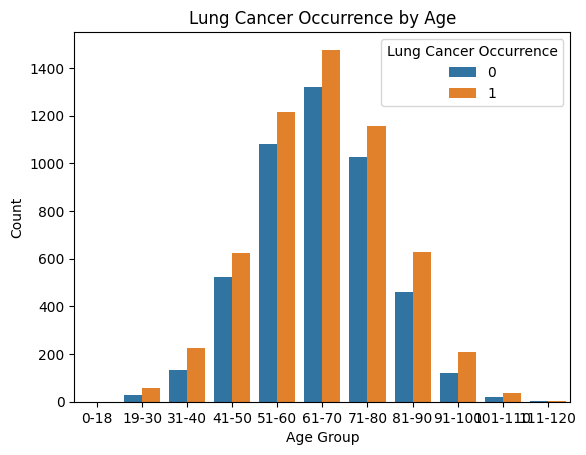

In [106]:
sns.countplot(x='Age Group', hue='Lung Cancer Occurrence', data=df)
plt.title('Lung Cancer Occurrence by Age')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

I need to encode the data in the columns of COPD History, Genetic Markers, Air Pollution Exposure, Taken Bronchodilators, Frequency of Tiredness and Dominant Hand

In [107]:
# Check the categories in Gender
unique_gender = df['Gender'].unique()
print(unique_gender)

['Male' 'MALE' 'Female' 'FEMALE' 'NAN']


I need to check the number of NAN values in Gender column

In [108]:
# Count the number of NaN values
nan_count = df['Gender'].isna().sum()
print(f'Number of NaN values in the Gender column: {nan_count}')

Number of NaN values in the Gender column: 0


It seems that NAN is a string. I shall check the number of NAN values.

In [109]:
matching_count = len(df[df['Gender'] == 'NAN'])
print(f'Number of NAN values in the Gender column: {matching_count}')

Number of NAN values in the Gender column: 1


Since None value in Gender column is only 1 row, I shall drop the row.

In [110]:
# Drop rows where Gender is equivalent to NAN and check the shape again
df = df.loc[df['Gender'] != 'NAN']
df.shape

(10347, 14)

I shall change all the text in Gender column to uppercase

In [111]:
#Change values in Gender column to uppercase
df['Gender'] = df['Gender'].str.upper()

<ipython-input-111-8b97453d6c93>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].str.upper()


In [112]:
# Check the categories in Gender
unique_gender = df['Gender'].unique()
print(unique_gender)

['MALE' 'FEMALE']


I want to view the distribution of the sample size of Lung Cancer Occurence by Gender

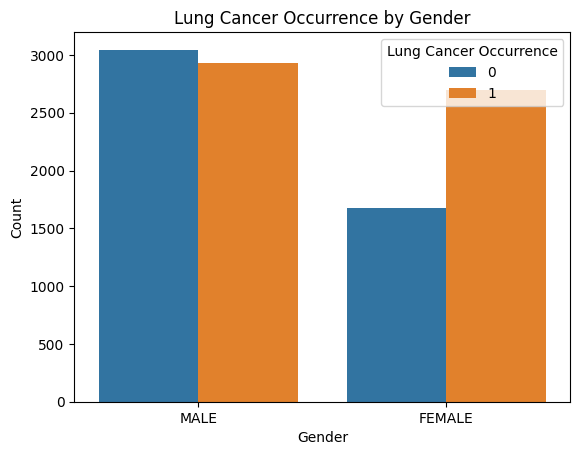

In [113]:
sns.countplot(x='Gender', hue='Lung Cancer Occurrence', data=df)
plt.title('Lung Cancer Occurrence by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

I shall perform one hot encoding on the dataset

In [114]:
# Apply one-hot encoding
gender_encoded = pd.get_dummies(df['Gender'], prefix='Gender')
print(gender_encoded)

       Gender_FEMALE  Gender_MALE
0                  0            1
1                  0            1
2                  0            1
3                  0            1
4                  0            1
...              ...          ...
10343              0            1
10344              1            0
10345              0            1
10346              0            1
10347              0            1

[10347 rows x 2 columns]


In [115]:
# Add encoded columns to dataset
df = pd.concat([df, gender_encoded], axis=1)
df.head()

,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Last Weight,Current Weight,Start Smoking,Stop Smoking,Taken Bronchodilators,Frequency of Tiredness,Dominant Hand,Lung Cancer Occurrence,Age Group,Gender_FEMALE,Gender_MALE
0,42,MALE,No,Not Present,Medium,73,69,2015,2020,No,None / Low,Right,1,41-50,0,1
1,72,MALE,Yes,Not Present,High,50,42,2006,2012,Yes,Medium,Right,1,71-80,0,1
2,65,MALE,Yes,Not Present,Low,65,75,1998,Still Smoking,Yes,None / Low,Right,0,61-70,0,1
3,67,MALE,No,Not Present,High,69,58,2011,2014,No,None / Low,Right,1,61-70,0,1
4,54,MALE,Yes,Not Present,Medium,46,40,1994,2017,Yes,None / Low,Right,0,51-60,0,1


In [116]:
# Check the categories in COPD History
unique_cop_hist = df['COPD History'].unique()
print(unique_cop_hist)

['No' 'Yes' None]


In [117]:
# Count the number of None values
none_count = df['COPD History'].isnull().sum()
print(f'Number of None values in the COPD History column: {none_count}')

Number of None values in the COPD History column: 1112


As the None values in the COPD History is about 10.7% of the dataset (1112/10348), I will choose to fill it as another flag.

In [118]:
# Fill the None values in COPD_History column with the string 'unknown'.
df['COPD History'] = df['COPD History'].fillna('unknown')
# Print the unique values again to check
unique_cop_hist = df['COPD History'].unique()
print(unique_cop_hist)

['No' 'Yes' 'unknown']


I want to view the distribution of the sample size of Lung Cancer Occurence by COPD History

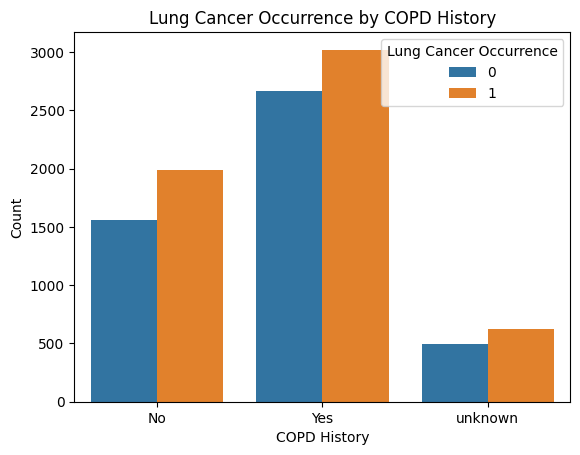

In [119]:
sns.countplot(x='COPD History', hue='Lung Cancer Occurrence', data=df)
plt.title('Lung Cancer Occurrence by COPD History')
plt.xlabel('COPD History')
plt.ylabel('Count')
plt.show()

In [120]:
# Apply one-hot encoding
copd_hist_encoded = pd.get_dummies(df['COPD History'], prefix='COPD History')
print(copd_hist_encoded)

       COPD History_No  COPD History_Yes  COPD History_unknown
0                    1                 0                     0
1                    0                 1                     0
2                    0                 1                     0
3                    1                 0                     0
4                    0                 1                     0
...                ...               ...                   ...
10343                0                 1                     0
10344                0                 1                     0
10345                1                 0                     0
10346                1                 0                     0
10347                0                 0                     1

[10347 rows x 3 columns]


In [121]:
# Add encoded columns to dataset
df = pd.concat([df, copd_hist_encoded], axis=1)
df.head()

,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Last Weight,Current Weight,Start Smoking,Stop Smoking,Taken Bronchodilators,Frequency of Tiredness,Dominant Hand,Lung Cancer Occurrence,Age Group,Gender_FEMALE,Gender_MALE,COPD History_No,COPD History_Yes,COPD History_unknown
0,42,MALE,No,Not Present,Medium,73,69,2015,2020,No,None / Low,Right,1,41-50,0,1,1,0,0
1,72,MALE,Yes,Not Present,High,50,42,2006,2012,Yes,Medium,Right,1,71-80,0,1,0,1,0
2,65,MALE,Yes,Not Present,Low,65,75,1998,Still Smoking,Yes,None / Low,Right,0,61-70,0,1,0,1,0
3,67,MALE,No,Not Present,High,69,58,2011,2014,No,None / Low,Right,1,61-70,0,1,1,0,0
4,54,MALE,Yes,Not Present,Medium,46,40,1994,2017,Yes,None / Low,Right,0,51-60,0,1,0,1,0


In [122]:
# Check the categories in Genetic Markers
unique_genetics_markers = df['Genetic Markers'].unique()
print(unique_genetics_markers)

['Not Present' 'Present']


I want to view the distribution of the sample size of Lung Cancer Occurence by Genetic Markers

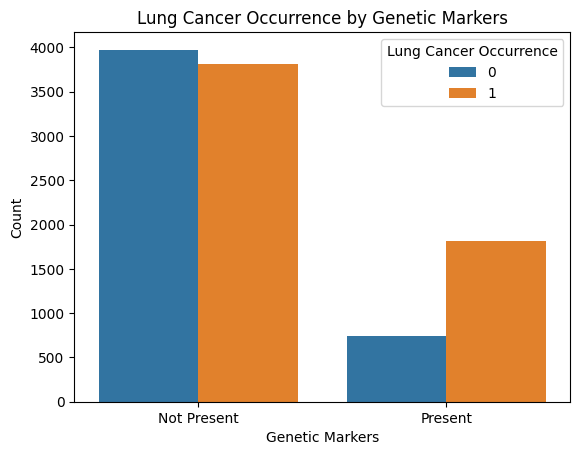

In [123]:
sns.countplot(x='Genetic Markers', hue='Lung Cancer Occurrence', data=df)
plt.title('Lung Cancer Occurrence by Genetic Markers')
plt.xlabel('Genetic Markers')
plt.ylabel('Count')
plt.show()

In [124]:
# Apply one-hot encoding
genetics_markers_encoded = pd.get_dummies(df['Genetic Markers'], prefix='Genetic Markers')
print(genetics_markers_encoded)

       Genetic Markers_Not Present  Genetic Markers_Present
0                                1                        0
1                                1                        0
2                                1                        0
3                                1                        0
4                                1                        0
...                            ...                      ...
10343                            0                        1
10344                            1                        0
10345                            1                        0
10346                            1                        0
10347                            1                        0

[10347 rows x 2 columns]


In [125]:
# Add encoded columns to dataset
df = pd.concat([df, genetics_markers_encoded], axis=1)
df.head()

,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Last Weight,Current Weight,Start Smoking,Stop Smoking,Taken Bronchodilators,...,Dominant Hand,Lung Cancer Occurrence,Age Group,Gender_FEMALE,Gender_MALE,COPD History_No,COPD History_Yes,COPD History_unknown,Genetic Markers_Not Present,Genetic Markers_Present
0,42,MALE,No,Not Present,Medium,73,69,2015,2020,No,...,Right,1,41-50,0,1,1,0,0,1,0
1,72,MALE,Yes,Not Present,High,50,42,2006,2012,Yes,...,Right,1,71-80,0,1,0,1,0,1,0
2,65,MALE,Yes,Not Present,Low,65,75,1998,Still Smoking,Yes,...,Right,0,61-70,0,1,0,1,0,1,0
3,67,MALE,No,Not Present,High,69,58,2011,2014,No,...,Right,1,61-70,0,1,1,0,0,1,0
4,54,MALE,Yes,Not Present,Medium,46,40,1994,2017,Yes,...,Right,0,51-60,0,1,0,1,0,1,0


In [126]:
# Check the categories in Air Pollution Exposure
unique_air_pol_exp = df['Air Pollution Exposure'].unique()
print(unique_air_pol_exp)

['Medium' 'High' 'Low' None]


In [127]:
# Count the number of None values in Air Pollution Exposure column
none_count = df['Air Pollution Exposure'].isnull().sum()
print(f'Number of None values in the Air Pollution Exposure column: {none_count}')

Number of None values in the Air Pollution Exposure column: 3


Since None value in Air Pollution Exposure column is only 3 rows, I shall drop the rows.

In [128]:
# Check shape before dropping
df.shape

(10347, 21)

In [129]:
# Drop rows where Gender is equivalent to None and check the shape again
df = df.dropna(subset=['Air Pollution Exposure'])
df.shape

(10344, 21)

I want to view the distribution of the sample size of Lung Cancer Occurence by Air Pollution Exposure

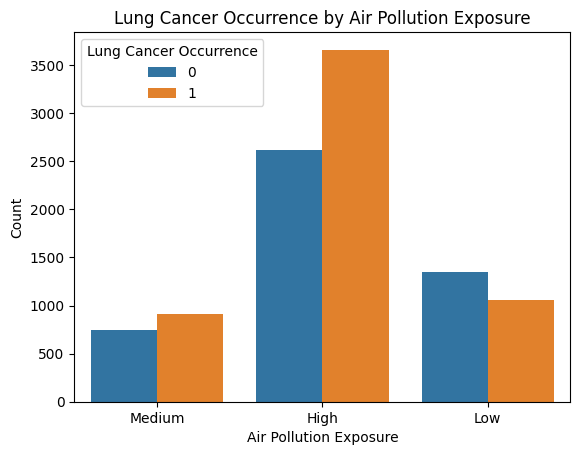

In [130]:
sns.countplot(x='Air Pollution Exposure', hue='Lung Cancer Occurrence', data=df)
plt.title('Lung Cancer Occurrence by Air Pollution Exposure')
plt.xlabel('Air Pollution Exposure')
plt.ylabel('Count')
plt.show()

In [131]:
# Apply one-hot encoding
air_pol_exp_encoded = pd.get_dummies(df['Air Pollution Exposure'], prefix='Air Pollution Exposure')
print(air_pol_exp_encoded)

       Air Pollution Exposure_High  Air Pollution Exposure_Low  \
0                                0                           0   
1                                1                           0   
2                                0                           1   
3                                1                           0   
4                                0                           0   
...                            ...                         ...   
10343                            0                           1   
10344                            0                           1   
10345                            1                           0   
10346                            1                           0   
10347                            0                           0   

       Air Pollution Exposure_Medium  
0                                  1  
1                                  0  
2                                  0  
3                                  0  
4           

In [132]:

# Add encoded columns to dataset
df = pd.concat([df, air_pol_exp_encoded], axis=1)
df.head()

,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Last Weight,Current Weight,Start Smoking,Stop Smoking,Taken Bronchodilators,...,Gender_FEMALE,Gender_MALE,COPD History_No,COPD History_Yes,COPD History_unknown,Genetic Markers_Not Present,Genetic Markers_Present,Air Pollution Exposure_High,Air Pollution Exposure_Low,Air Pollution Exposure_Medium
0,42,MALE,No,Not Present,Medium,73,69,2015,2020,No,...,0,1,1,0,0,1,0,0,0,1
1,72,MALE,Yes,Not Present,High,50,42,2006,2012,Yes,...,0,1,0,1,0,1,0,1,0,0
2,65,MALE,Yes,Not Present,Low,65,75,1998,Still Smoking,Yes,...,0,1,0,1,0,1,0,0,1,0
3,67,MALE,No,Not Present,High,69,58,2011,2014,No,...,0,1,1,0,0,1,0,1,0,0
4,54,MALE,Yes,Not Present,Medium,46,40,1994,2017,Yes,...,0,1,0,1,0,1,0,0,0,1


In [133]:
# Check the categories in Taken Bronchodilators
unique_taken_broncho = df['Taken Bronchodilators'].unique()
print(unique_taken_broncho)

['No' 'Yes' None]


In [134]:
# Count the number of None values in Taken Bronchodilators column
none_count = df['Taken Bronchodilators'].isnull().sum()
print(f'Number of None values in the Taken Bronchodilators column: {none_count}')

Number of None values in the Taken Bronchodilators column: 1060


As the None values in the Taken Bronchodilators is about 10.2% of the remaining dataset (1060/10344), I will choose to fill it as another flag.

In [135]:
# Fill the None values in Taken Bronchodilators column with the string 'unknown'.
df['Taken Bronchodilators'] = df['Taken Bronchodilators'].fillna('unknown')
# Print the unique values again to check
unique_taken_broncho = df['Taken Bronchodilators'].unique()
print(unique_taken_broncho)

['No' 'Yes' 'unknown']


I want to view the distribution of the sample size of Lung Cancer Occurence by Taken Bronchodilators

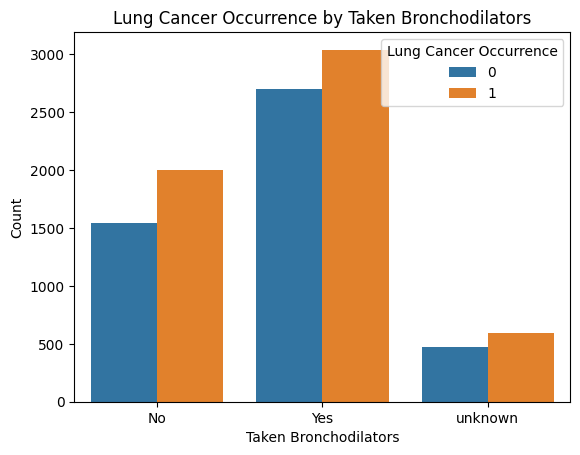

In [136]:
sns.countplot(x='Taken Bronchodilators', hue='Lung Cancer Occurrence', data=df)
plt.title('Lung Cancer Occurrence by Taken Bronchodilators')
plt.xlabel('Taken Bronchodilators')
plt.ylabel('Count')
plt.show()

In [137]:
# Apply one-hot encoding
taken_broncho_encoded = pd.get_dummies(df['Taken Bronchodilators'], prefix='Taken Bronchodilators')
print(taken_broncho_encoded)

       Taken Bronchodilators_No  Taken Bronchodilators_Yes  \
0                             1                          0   
1                             0                          1   
2                             0                          1   
3                             1                          0   
4                             0                          1   
...                         ...                        ...   
10343                         0                          1   
10344                         0                          1   
10345                         1                          0   
10346                         1                          0   
10347                         1                          0   

       Taken Bronchodilators_unknown  
0                                  0  
1                                  0  
2                                  0  
3                                  0  
4                                  0  
...                  

In [138]:
# Add encoded columns to dataset
df = pd.concat([df, taken_broncho_encoded], axis=1)
df.head()

,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Last Weight,Current Weight,Start Smoking,Stop Smoking,Taken Bronchodilators,...,COPD History_Yes,COPD History_unknown,Genetic Markers_Not Present,Genetic Markers_Present,Air Pollution Exposure_High,Air Pollution Exposure_Low,Air Pollution Exposure_Medium,Taken Bronchodilators_No,Taken Bronchodilators_Yes,Taken Bronchodilators_unknown
0,42,MALE,No,Not Present,Medium,73,69,2015,2020,No,...,0,0,1,0,0,0,1,1,0,0
1,72,MALE,Yes,Not Present,High,50,42,2006,2012,Yes,...,1,0,1,0,1,0,0,0,1,0
2,65,MALE,Yes,Not Present,Low,65,75,1998,Still Smoking,Yes,...,1,0,1,0,0,1,0,0,1,0
3,67,MALE,No,Not Present,High,69,58,2011,2014,No,...,0,0,1,0,1,0,0,1,0,0
4,54,MALE,Yes,Not Present,Medium,46,40,1994,2017,Yes,...,1,0,1,0,0,0,1,0,1,0


In [139]:
# Check the categories in Frequency of Tiredness
unique_freq_tired = df['Frequency of Tiredness'].unique()
print(unique_freq_tired)

['None / Low' 'Medium' 'High']


I want to view the distribution of the sample size of Lung Cancer Occurence by Frequency of Tiredness

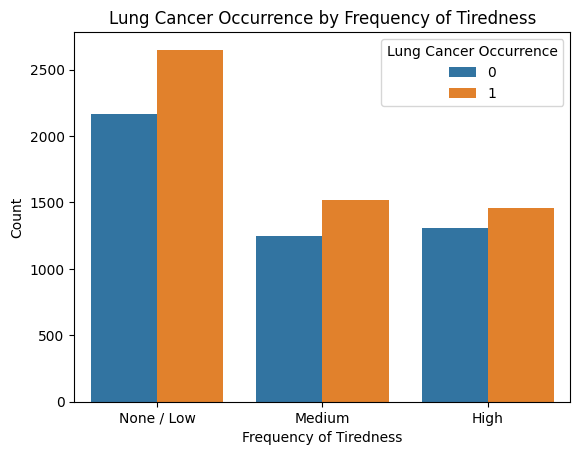

In [140]:
sns.countplot(x='Frequency of Tiredness', hue='Lung Cancer Occurrence', data=df)
plt.title('Lung Cancer Occurrence by Frequency of Tiredness')
plt.xlabel('Frequency of Tiredness')
plt.ylabel('Count')
plt.show()

In [141]:
# Apply one-hot encoding
freq_tired_encoded = pd.get_dummies(df['Frequency of Tiredness'], prefix='Frequency of Tiredness')
print(freq_tired_encoded)

       Frequency of Tiredness_High  Frequency of Tiredness_Medium  \
0                                0                              0   
1                                0                              1   
2                                0                              0   
3                                0                              0   
4                                0                              0   
...                            ...                            ...   
10343                            0                              1   
10344                            0                              1   
10345                            0                              1   
10346                            0                              1   
10347                            0                              0   

       Frequency of Tiredness_None / Low  
0                                      1  
1                                      0  
2                                      1  

In [142]:
# Add encoded columns to dataset
df = pd.concat([df, freq_tired_encoded], axis=1)
df.head()

,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Last Weight,Current Weight,Start Smoking,Stop Smoking,Taken Bronchodilators,...,Genetic Markers_Present,Air Pollution Exposure_High,Air Pollution Exposure_Low,Air Pollution Exposure_Medium,Taken Bronchodilators_No,Taken Bronchodilators_Yes,Taken Bronchodilators_unknown,Frequency of Tiredness_High,Frequency of Tiredness_Medium,Frequency of Tiredness_None / Low
0,42,MALE,No,Not Present,Medium,73,69,2015,2020,No,...,0,0,0,1,1,0,0,0,0,1
1,72,MALE,Yes,Not Present,High,50,42,2006,2012,Yes,...,0,1,0,0,0,1,0,0,1,0
2,65,MALE,Yes,Not Present,Low,65,75,1998,Still Smoking,Yes,...,0,0,1,0,0,1,0,0,0,1
3,67,MALE,No,Not Present,High,69,58,2011,2014,No,...,0,1,0,0,1,0,0,0,0,1
4,54,MALE,Yes,Not Present,Medium,46,40,1994,2017,Yes,...,0,0,0,1,0,1,0,0,0,1


In [143]:
# Check the categories in Dominant Hand
unique_dom_hand = df['Dominant Hand'].unique()
print(unique_dom_hand)

['Right' 'Left' 'RightBoth']


I want to view the distribution of the sample size of Lung Cancer Occurence by Dominant Hand

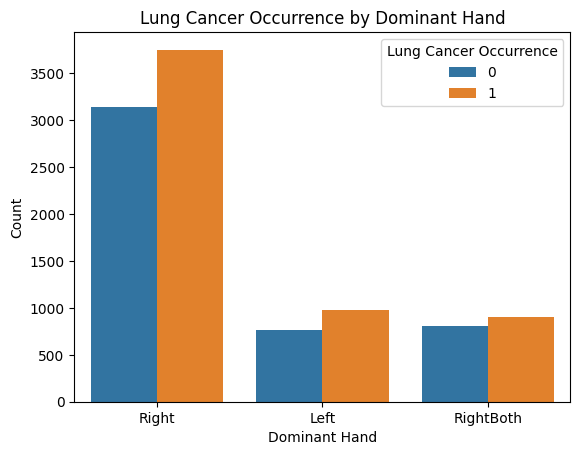

In [144]:
sns.countplot(x='Dominant Hand', hue='Lung Cancer Occurrence', data=df)
plt.title('Lung Cancer Occurrence by Dominant Hand')
plt.xlabel('Dominant Hand')
plt.ylabel('Count')
plt.show()

In [145]:
# Apply one-hot encoding
dom_hand_encoded = pd.get_dummies(df['Dominant Hand'], prefix='Dominant Hand')
print(dom_hand_encoded)

       Dominant Hand_Left  Dominant Hand_Right  Dominant Hand_RightBoth
0                       0                    1                        0
1                       0                    1                        0
2                       0                    1                        0
3                       0                    1                        0
4                       0                    1                        0
...                   ...                  ...                      ...
10343                   0                    1                        0
10344                   0                    0                        1
10345                   0                    0                        1
10346                   0                    1                        0
10347                   0                    1                        0

[10344 rows x 3 columns]


In [146]:
# Add encoded columns to dataset
df = pd.concat([df, dom_hand_encoded], axis=1)
df.head()

,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Last Weight,Current Weight,Start Smoking,Stop Smoking,Taken Bronchodilators,...,Air Pollution Exposure_Medium,Taken Bronchodilators_No,Taken Bronchodilators_Yes,Taken Bronchodilators_unknown,Frequency of Tiredness_High,Frequency of Tiredness_Medium,Frequency of Tiredness_None / Low,Dominant Hand_Left,Dominant Hand_Right,Dominant Hand_RightBoth
0,42,MALE,No,Not Present,Medium,73,69,2015,2020,No,...,1,1,0,0,0,0,1,0,1,0
1,72,MALE,Yes,Not Present,High,50,42,2006,2012,Yes,...,0,0,1,0,0,1,0,0,1,0
2,65,MALE,Yes,Not Present,Low,65,75,1998,Still Smoking,Yes,...,0,0,1,0,0,0,1,0,1,0
3,67,MALE,No,Not Present,High,69,58,2011,2014,No,...,0,1,0,0,0,0,1,0,1,0
4,54,MALE,Yes,Not Present,Medium,46,40,1994,2017,Yes,...,1,0,1,0,0,0,1,0,1,0


Now I will need to calculate the difference of Last Weight and Current Weight columns to derive a new column named Weight Change.

In [147]:
# Count the number of None values in Last Weight column
none_count = df['Last Weight'].isnull().sum()
print(f'Number of None values in the Last Weight column: {none_count}')

Number of None values in the Last Weight column: 0


In [148]:
# Count the number of NaN values in Last Weight column
nan_count = df['Last Weight'].isna().sum()
print(f'Number of NaN values in the Last Weight column: {nan_count}')

Number of NaN values in the Last Weight column: 0


In [149]:
# Count the number of None values in Current Weight column
none_count = df['Current Weight'].isnull().sum()
print(f'Number of None values in the Current Weight column: {none_count}')

Number of None values in the Current Weight column: 0


In [150]:
# Count the number of NaN values in Current Weight column
nan_count = df['Current Weight'].isna().sum()
print(f'Number of NaN values in the Current Weight column: {nan_count}')

Number of NaN values in the Current Weight column: 0


In [151]:
# Minus the Last Weight from Current Weight and put the result in a new column
df['Weight Change'] = df['Last Weight'] - df['Current Weight']
df.head()

,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Last Weight,Current Weight,Start Smoking,Stop Smoking,Taken Bronchodilators,...,Taken Bronchodilators_No,Taken Bronchodilators_Yes,Taken Bronchodilators_unknown,Frequency of Tiredness_High,Frequency of Tiredness_Medium,Frequency of Tiredness_None / Low,Dominant Hand_Left,Dominant Hand_Right,Dominant Hand_RightBoth,Weight Change
0,42,MALE,No,Not Present,Medium,73,69,2015,2020,No,...,1,0,0,0,0,1,0,1,0,4
1,72,MALE,Yes,Not Present,High,50,42,2006,2012,Yes,...,0,1,0,0,1,0,0,1,0,8
2,65,MALE,Yes,Not Present,Low,65,75,1998,Still Smoking,Yes,...,0,1,0,0,0,1,0,1,0,-10
3,67,MALE,No,Not Present,High,69,58,2011,2014,No,...,1,0,0,0,0,1,0,1,0,11
4,54,MALE,Yes,Not Present,Medium,46,40,1994,2017,Yes,...,0,1,0,0,0,1,0,1,0,6


In [152]:
# Drop the Last Weight and Current Weight columns
df = df.drop(['Last Weight','Current Weight'], axis=1)
df.head()

,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Start Smoking,Stop Smoking,Taken Bronchodilators,Frequency of Tiredness,Dominant Hand,...,Taken Bronchodilators_No,Taken Bronchodilators_Yes,Taken Bronchodilators_unknown,Frequency of Tiredness_High,Frequency of Tiredness_Medium,Frequency of Tiredness_None / Low,Dominant Hand_Left,Dominant Hand_Right,Dominant Hand_RightBoth,Weight Change
0,42,MALE,No,Not Present,Medium,2015,2020,No,None / Low,Right,...,1,0,0,0,0,1,0,1,0,4
1,72,MALE,Yes,Not Present,High,2006,2012,Yes,Medium,Right,...,0,1,0,0,1,0,0,1,0,8
2,65,MALE,Yes,Not Present,Low,1998,Still Smoking,Yes,None / Low,Right,...,0,1,0,0,0,1,0,1,0,-10
3,67,MALE,No,Not Present,High,2011,2014,No,None / Low,Right,...,1,0,0,0,0,1,0,1,0,11
4,54,MALE,Yes,Not Present,Medium,1994,2017,Yes,None / Low,Right,...,0,1,0,0,0,1,0,1,0,6


In [153]:
df.describe()

,Age,Lung Cancer Occurrence,Gender_FEMALE,Gender_MALE,COPD History_No,COPD History_Yes,COPD History_unknown,Genetic Markers_Not Present,Genetic Markers_Present,Air Pollution Exposure_High,...,Taken Bronchodilators_No,Taken Bronchodilators_Yes,Taken Bronchodilators_unknown,Frequency of Tiredness_High,Frequency of Tiredness_Medium,Frequency of Tiredness_None / Low,Dominant Hand_Left,Dominant Hand_Right,Dominant Hand_RightBoth,Weight Change
count,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,...,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000
mean,64.081013,0.544180,0.422467,0.577533,0.342517,0.550077,0.107405,0.752417,0.247583,0.607309,...,0.342517,0.555008,0.102475,0.267305,0.267401,0.465294,0.168697,0.666377,0.164927,2.987432
std,14.279953,0.498068,0.493976,0.493976,0.474575,0.497510,0.309643,0.431629,0.431629,0.488373,...,0.474575,0.496989,0.303286,0.442574,0.442625,0.498818,0.374502,0.471530,0.371132,6.717230
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000
50%,64.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000
75%,74.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,8.000000
max,120.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000


I want to view the distribution of the sample size of Lung Cancer Occurence by Weight Change

In [154]:
# Define Weight Change Group bins and labels
bins = [-20, -15, -10, -5, 0, 5, 10, 15, 20]
labels = ['-20 to -16', '-15 to -11', '-10 to -6', '-5 to -1', '0 to 4', '5 to 9', '10 to 14', '15 to 20']

# Create Weight Change Group column based on Weight Change column
df['Weight Change Group'] = pd.cut(df['Weight Change'], bins=bins, labels=labels, right=False)

df.head()

,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Start Smoking,Stop Smoking,Taken Bronchodilators,Frequency of Tiredness,Dominant Hand,...,Taken Bronchodilators_Yes,Taken Bronchodilators_unknown,Frequency of Tiredness_High,Frequency of Tiredness_Medium,Frequency of Tiredness_None / Low,Dominant Hand_Left,Dominant Hand_Right,Dominant Hand_RightBoth,Weight Change,Weight Change Group
0,42,MALE,No,Not Present,Medium,2015,2020,No,None / Low,Right,...,0,0,0,0,1,0,1,0,4,0 to 4
1,72,MALE,Yes,Not Present,High,2006,2012,Yes,Medium,Right,...,1,0,0,1,0,0,1,0,8,5 to 9
2,65,MALE,Yes,Not Present,Low,1998,Still Smoking,Yes,None / Low,Right,...,1,0,0,0,1,0,1,0,-10,-10 to -6
3,67,MALE,No,Not Present,High,2011,2014,No,None / Low,Right,...,0,0,0,0,1,0,1,0,11,10 to 14
4,54,MALE,Yes,Not Present,Medium,1994,2017,Yes,None / Low,Right,...,1,0,0,0,1,0,1,0,6,5 to 9


I want to view the distribution of the sample size of Lung Cancer Occurence by Weight Change Group

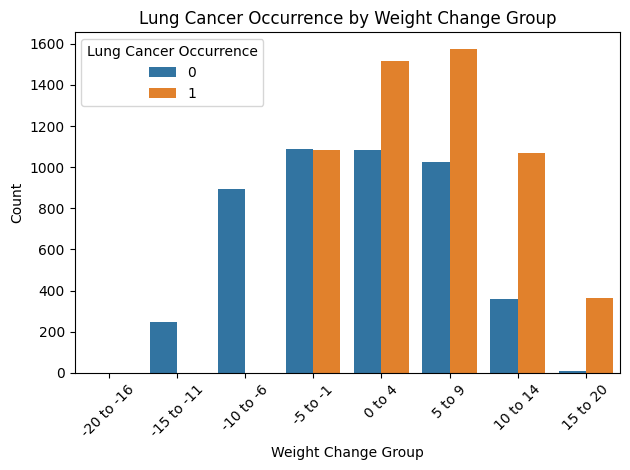

In [155]:
sns.countplot(x='Weight Change Group', hue='Lung Cancer Occurrence', data=df)
plt.title('Lung Cancer Occurrence by Weight Change Group')
plt.xlabel('Weight Change Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Now I will need to calculate the difference of 'Start Smoking' and 'Stop Smoking' columns to derive a new column named 'Years Quitted Smoking'.

In [156]:
# Check the unique values in Start Smoking
unique_start_smoking = df['Start Smoking'].unique()
print(unique_start_smoking)

['2015' '2006' '1998' '2011' '1994' '2001' '1982' '1996' '1959' '2020'
 '2008' '2012' '1976' '2000' 'Not Applicable' '2004' '1981' '1999' '1963'
 '1991' '1995' '2019' '1973' '1967' '2016' '1975' '2021' '1978' '1987'
 '1980' '2018' '2003' '1979' '1969' '2023' '1955' '2017' '1997' '1962'
 '2013' '2022' '1971' '1960' '2005' '1993' '1972' '2010' '1985' '2007'
 '2014' '1961' '1945' '1974' '1965' '1966' '2009' '1989' '1954' '1970'
 '1950' '1953' '1990' '1948' '1958' '1940' '1984' '1968' '1986' '1983'
 '1988' '1956' '2024' '1992' '1977' '1939' '2002' '1957' '1923' '1944'
 '1964' '1943' '1952' '1951' '1947' '1935' '1941' '1930' '1937' '1927'
 '1946' '1934' '1928' '1942' '1949' '1938' '1936' '1929']


In [157]:
# Check the unique values in Stop Smoking
unique_stop_smoking = df['Stop Smoking'].unique()
print(unique_stop_smoking)

['2020' '2012' 'Still Smoking' '2014' '2017' '2022' '2009' '2021' '1999'
 '2016' 'Not Applicable' '1996' '1982' '1963' '1998' '2019' '2004' '1991'
 '1994' '2023' '2006' '2018' '2008' '2007' '1988' '1981' '1995' '1967'
 '2015' '1971' '1984' '2005' '2001' '2003' '2011' '1992' '2010' '2013'
 '1968' '1989' '1986' '1977' '2002' '1983' '1993' '1997' '1965' '1980'
 '1950' '1979' '1990' '1976' '2000' '1975' '1973' '1978' '1972' '1987'
 '1974' '1970' '1985' '1966' '1964' '1962' '1953' '1946' '1949' '1947'
 '1961' '1958' '1969' '1960' '1959' '1952' '1956' '1957' '1955' '1954'
 '1941' '1940' '1939' '1933' '1944' '1948']


It seems that 'Not Applicable' is for non smokers but I must investigate further. I will check if all. the rows in Start Smoking is Not Applicable has a corresponding value of the same in Stop Smoking column.

In [158]:
# Check for different values where Start Smoking is 'Not Applicable' but Stop Smoking is not
filtered_df = df[(df['Start Smoking'] == 'Not Applicable') & (df['Stop Smoking'] != 'Not Applicable')]
print(filtered_df)

Empty DataFrame
Columns: [Age, Gender, COPD History, Genetic Markers, Air Pollution Exposure, Start Smoking, Stop Smoking, Taken Bronchodilators, Frequency of Tiredness, Dominant Hand, Lung Cancer Occurrence, Age Group, Gender_FEMALE, Gender_MALE, COPD History_No, COPD History_Yes, COPD History_unknown, Genetic Markers_Not Present, Genetic Markers_Present, Air Pollution Exposure_High, Air Pollution Exposure_Low, Air Pollution Exposure_Medium, Taken Bronchodilators_No, Taken Bronchodilators_Yes, Taken Bronchodilators_unknown, Frequency of Tiredness_High, Frequency of Tiredness_Medium, Frequency of Tiredness_None / Low, Dominant Hand_Left, Dominant Hand_Right, Dominant Hand_RightBoth, Weight Change, Weight Change Group]
Index: []

[0 rows x 33 columns]


In [159]:
# Check for different values where Stop Smoking is 'Not Applicable' but Start Smoking is not
filtered_df = df[(df['Start Smoking'] != 'Not Applicable') & (df['Stop Smoking'] == 'Not Applicable')]
print(filtered_df)

Empty DataFrame
Columns: [Age, Gender, COPD History, Genetic Markers, Air Pollution Exposure, Start Smoking, Stop Smoking, Taken Bronchodilators, Frequency of Tiredness, Dominant Hand, Lung Cancer Occurrence, Age Group, Gender_FEMALE, Gender_MALE, COPD History_No, COPD History_Yes, COPD History_unknown, Genetic Markers_Not Present, Genetic Markers_Present, Air Pollution Exposure_High, Air Pollution Exposure_Low, Air Pollution Exposure_Medium, Taken Bronchodilators_No, Taken Bronchodilators_Yes, Taken Bronchodilators_unknown, Frequency of Tiredness_High, Frequency of Tiredness_Medium, Frequency of Tiredness_None / Low, Dominant Hand_Left, Dominant Hand_Right, Dominant Hand_RightBoth, Weight Change, Weight Change Group]
Index: []

[0 rows x 33 columns]


Since both Start Smoking and Stop Smoking have the same values where the value is 'Not Applicable', I can safely assume that 'Not Applicable' are for non-smokers. I will replace the Start Smoking column with values 'Not Applicable' with 0000 and Stop Smoking column with values 'Not Applicable' with 9999

In [160]:
# Replace the values 'Not Applicable' with 0000
df['Start Smoking'] = df['Start Smoking'].replace('Not Applicable', '0000')
df['Stop Smoking'] = df['Stop Smoking'].replace('Not Applicable', '9999')
# Check the unique values in Start Smoking
unique_start_smoking = df['Start Smoking'].unique()
print(unique_start_smoking)

['2015' '2006' '1998' '2011' '1994' '2001' '1982' '1996' '1959' '2020'
 '2008' '2012' '1976' '2000' '0000' '2004' '1981' '1999' '1963' '1991'
 '1995' '2019' '1973' '1967' '2016' '1975' '2021' '1978' '1987' '1980'
 '2018' '2003' '1979' '1969' '2023' '1955' '2017' '1997' '1962' '2013'
 '2022' '1971' '1960' '2005' '1993' '1972' '2010' '1985' '2007' '2014'
 '1961' '1945' '1974' '1965' '1966' '2009' '1989' '1954' '1970' '1950'
 '1953' '1990' '1948' '1958' '1940' '1984' '1968' '1986' '1983' '1988'
 '1956' '2024' '1992' '1977' '1939' '2002' '1957' '1923' '1944' '1964'
 '1943' '1952' '1951' '1947' '1935' '1941' '1930' '1937' '1927' '1946'
 '1934' '1928' '1942' '1949' '1938' '1936' '1929']


In [161]:
# Check the unique values in Stop Smoking
unique_stop_smoking = df['Stop Smoking'].unique()
print(unique_stop_smoking)

['2020' '2012' 'Still Smoking' '2014' '2017' '2022' '2009' '2021' '1999'
 '2016' '9999' '1996' '1982' '1963' '1998' '2019' '2004' '1991' '1994'
 '2023' '2006' '2018' '2008' '2007' '1988' '1981' '1995' '1967' '2015'
 '1971' '1984' '2005' '2001' '2003' '2011' '1992' '2010' '2013' '1968'
 '1989' '1986' '1977' '2002' '1983' '1993' '1997' '1965' '1980' '1950'
 '1979' '1990' '1976' '2000' '1975' '1973' '1978' '1972' '1987' '1974'
 '1970' '1985' '1966' '1964' '1962' '1953' '1946' '1949' '1947' '1961'
 '1958' '1969' '1960' '1959' '1952' '1956' '1957' '1955' '1954' '1941'
 '1940' '1939' '1933' '1944' '1948']


I will now replace Still Smoking in Stop Smoking column with 9999

In [162]:
# Replace the values 'Still Smoking' with 9999
df['Stop Smoking'] = df['Stop Smoking'].replace('Still Smoking', '9999')
# Check the unique values in Stop Smoking
unique_stop_smoking = df['Stop Smoking'].unique()
print(unique_stop_smoking)

['2020' '2012' '9999' '2014' '2017' '2022' '2009' '2021' '1999' '2016'
 '1996' '1982' '1963' '1998' '2019' '2004' '1991' '1994' '2023' '2006'
 '2018' '2008' '2007' '1988' '1981' '1995' '1967' '2015' '1971' '1984'
 '2005' '2001' '2003' '2011' '1992' '2010' '2013' '1968' '1989' '1986'
 '1977' '2002' '1983' '1993' '1997' '1965' '1980' '1950' '1979' '1990'
 '1976' '2000' '1975' '1973' '1978' '1972' '1987' '1974' '1970' '1985'
 '1966' '1964' '1962' '1953' '1946' '1949' '1947' '1961' '1958' '1969'
 '1960' '1959' '1952' '1956' '1957' '1955' '1954' '1941' '1940' '1939'
 '1933' '1944' '1948']


Now I will deduct the values in Stop Smoking Column from Start Smoking column.  Any value with the value of 0 can be interpreted as a non-smoker. Any value above 3000, I can assume that the person is still smoking. Any negative value needs to be investigated further.

In [163]:
# Change the datatype of values in Start Smoking and Stop Smoking to integers
df['Start Smoking'] = df['Start Smoking'].astype(int)
df['Stop Smoking'] = df['Stop Smoking'].astype(int)
df.head()

,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Start Smoking,Stop Smoking,Taken Bronchodilators,Frequency of Tiredness,Dominant Hand,...,Taken Bronchodilators_Yes,Taken Bronchodilators_unknown,Frequency of Tiredness_High,Frequency of Tiredness_Medium,Frequency of Tiredness_None / Low,Dominant Hand_Left,Dominant Hand_Right,Dominant Hand_RightBoth,Weight Change,Weight Change Group
0,42,MALE,No,Not Present,Medium,2015,2020,No,None / Low,Right,...,0,0,0,0,1,0,1,0,4,0 to 4
1,72,MALE,Yes,Not Present,High,2006,2012,Yes,Medium,Right,...,1,0,0,1,0,0,1,0,8,5 to 9
2,65,MALE,Yes,Not Present,Low,1998,9999,Yes,None / Low,Right,...,1,0,0,0,1,0,1,0,-10,-10 to -6
3,67,MALE,No,Not Present,High,2011,2014,No,None / Low,Right,...,0,0,0,0,1,0,1,0,11,10 to 14
4,54,MALE,Yes,Not Present,Medium,1994,2017,Yes,None / Low,Right,...,1,0,0,0,1,0,1,0,6,5 to 9


In [164]:
# Subtract 'Stop Smoking' from 'Start Smoking' and store the result in a new column 'Years Quitted Smoking'
df['Years Quitted Smoking'] = df['Stop Smoking'] - df['Start Smoking']
df.head()

,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Start Smoking,Stop Smoking,Taken Bronchodilators,Frequency of Tiredness,Dominant Hand,...,Taken Bronchodilators_unknown,Frequency of Tiredness_High,Frequency of Tiredness_Medium,Frequency of Tiredness_None / Low,Dominant Hand_Left,Dominant Hand_Right,Dominant Hand_RightBoth,Weight Change,Weight Change Group,Years Quitted Smoking
0,42,MALE,No,Not Present,Medium,2015,2020,No,None / Low,Right,...,0,0,0,1,0,1,0,4,0 to 4,5
1,72,MALE,Yes,Not Present,High,2006,2012,Yes,Medium,Right,...,0,0,1,0,0,1,0,8,5 to 9,6
2,65,MALE,Yes,Not Present,Low,1998,9999,Yes,None / Low,Right,...,0,0,0,1,0,1,0,-10,-10 to -6,8001
3,67,MALE,No,Not Present,High,2011,2014,No,None / Low,Right,...,0,0,0,1,0,1,0,11,10 to 14,3
4,54,MALE,Yes,Not Present,Medium,1994,2017,Yes,None / Low,Right,...,0,0,0,1,0,1,0,6,5 to 9,23


In [165]:
# Replace the values in Years Quitted Smoking above 3000 with 9999
df.loc[(df['Years Quitted Smoking'] > 3000) & (df['Years Quitted Smoking'] != 9999), 'Years Quitted Smoking'] = 0
df.head()

,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Start Smoking,Stop Smoking,Taken Bronchodilators,Frequency of Tiredness,Dominant Hand,...,Taken Bronchodilators_unknown,Frequency of Tiredness_High,Frequency of Tiredness_Medium,Frequency of Tiredness_None / Low,Dominant Hand_Left,Dominant Hand_Right,Dominant Hand_RightBoth,Weight Change,Weight Change Group,Years Quitted Smoking
0,42,MALE,No,Not Present,Medium,2015,2020,No,None / Low,Right,...,0,0,0,1,0,1,0,4,0 to 4,5
1,72,MALE,Yes,Not Present,High,2006,2012,Yes,Medium,Right,...,0,0,1,0,0,1,0,8,5 to 9,6
2,65,MALE,Yes,Not Present,Low,1998,9999,Yes,None / Low,Right,...,0,0,0,1,0,1,0,-10,-10 to -6,0
3,67,MALE,No,Not Present,High,2011,2014,No,None / Low,Right,...,0,0,0,1,0,1,0,11,10 to 14,3
4,54,MALE,Yes,Not Present,Medium,1994,2017,Yes,None / Low,Right,...,0,0,0,1,0,1,0,6,5 to 9,23


I wish to visualize the distribution of the Years Quitted Smoking

In [166]:
df.describe()

,Age,Start Smoking,Stop Smoking,Lung Cancer Occurrence,Gender_FEMALE,Gender_MALE,COPD History_No,COPD History_Yes,COPD History_unknown,Genetic Markers_Not Present,...,Taken Bronchodilators_Yes,Taken Bronchodilators_unknown,Frequency of Tiredness_High,Frequency of Tiredness_Medium,Frequency of Tiredness_None / Low,Dominant Hand_Left,Dominant Hand_Right,Dominant Hand_RightBoth,Weight Change,Years Quitted Smoking
count,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,...,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000
mean,64.081013,1862.326083,4112.399555,0.544180,0.422467,0.577533,0.342517,0.550077,0.107405,0.752417,...,0.555008,0.102475,0.267305,0.267401,0.465294,0.168697,0.666377,0.164927,2.987432,661.560518
std,14.279953,491.295508,3520.648821,0.498068,0.493976,0.493976,0.474575,0.497510,0.309643,0.431629,...,0.496989,0.303286,0.442574,0.442625,0.498818,0.374502,0.471530,0.371132,6.717230,2461.404139
min,18.000000,0.000000,1933.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,0.000000
25%,55.000000,1973.000000,2004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,0.000000
50%,64.000000,1991.000000,2017.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,9.000000
75%,74.000000,2007.000000,9999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,8.000000,24.000000
max,120.000000,2024.000000,9999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,9999.000000


In [167]:
# Define Years Quitted Smoking Group bins and labels
bins = [0, 1, 5, 10, 15, 20, 25, 30, 35, 40, 9999]
labels = ['Still Smoking', '1-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', 'None Smokers']

# Create Years Quitted Smoking Group column based on Years Quitted Smoking column
df['Years Quitted Smoking Group'] = pd.cut(df['Years Quitted Smoking'], bins=bins, labels=labels, right=False)

df.head()

,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Start Smoking,Stop Smoking,Taken Bronchodilators,Frequency of Tiredness,Dominant Hand,...,Frequency of Tiredness_High,Frequency of Tiredness_Medium,Frequency of Tiredness_None / Low,Dominant Hand_Left,Dominant Hand_Right,Dominant Hand_RightBoth,Weight Change,Weight Change Group,Years Quitted Smoking,Years Quitted Smoking Group
0,42,MALE,No,Not Present,Medium,2015,2020,No,None / Low,Right,...,0,0,1,0,1,0,4,0 to 4,5,5-9
1,72,MALE,Yes,Not Present,High,2006,2012,Yes,Medium,Right,...,0,1,0,0,1,0,8,5 to 9,6,5-9
2,65,MALE,Yes,Not Present,Low,1998,9999,Yes,None / Low,Right,...,0,0,1,0,1,0,-10,-10 to -6,0,Still Smoking
3,67,MALE,No,Not Present,High,2011,2014,No,None / Low,Right,...,0,0,1,0,1,0,11,10 to 14,3,1-4
4,54,MALE,Yes,Not Present,Medium,1994,2017,Yes,None / Low,Right,...,0,0,1,0,1,0,6,5 to 9,23,20-24


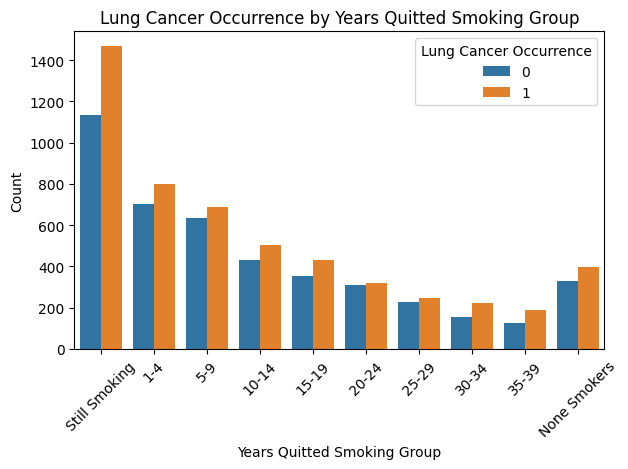

In [168]:
sns.countplot(x='Years Quitted Smoking Group', hue='Lung Cancer Occurrence', data=df)
plt.title('Lung Cancer Occurrence by Years Quitted Smoking Group')
plt.xlabel('Years Quitted Smoking Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [174]:
df.describe()

,Age,Start Smoking,Stop Smoking,Lung Cancer Occurrence,Gender_FEMALE,Gender_MALE,COPD History_No,COPD History_Yes,COPD History_unknown,Genetic Markers_Not Present,...,Taken Bronchodilators_Yes,Taken Bronchodilators_unknown,Frequency of Tiredness_High,Frequency of Tiredness_Medium,Frequency of Tiredness_None / Low,Dominant Hand_Left,Dominant Hand_Right,Dominant Hand_RightBoth,Weight Change,Years Quitted Smoking
count,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,...,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000,10344.000000
mean,64.081013,1862.326083,4112.399555,0.544180,0.422467,0.577533,0.342517,0.550077,0.107405,0.752417,...,0.555008,0.102475,0.267305,0.267401,0.465294,0.168697,0.666377,0.164927,2.987432,661.560518
std,14.279953,491.295508,3520.648821,0.498068,0.493976,0.493976,0.474575,0.497510,0.309643,0.431629,...,0.496989,0.303286,0.442574,0.442625,0.498818,0.374502,0.471530,0.371132,6.717230,2461.404139
min,18.000000,0.000000,1933.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,0.000000
25%,55.000000,1973.000000,2004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,0.000000
50%,64.000000,1991.000000,2017.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,9.000000
75%,74.000000,2007.000000,9999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,8.000000,24.000000
max,120.000000,2024.000000,9999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,9999.000000


Since that there are no negative values in Years Quitted Smoking column, I can assume that it does not require further investigation.

In [170]:
df.shape

(10344, 35)

In [171]:
# Export the dataframe to csv
df.to_csv('cleaned_data.csv')

Now that I have cleaned and transformed the data, I will analyse it.

In [172]:
# Calculate correlation
correlation_matrix = df.corr()

<ipython-input-172-6a6a5b0be9c2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


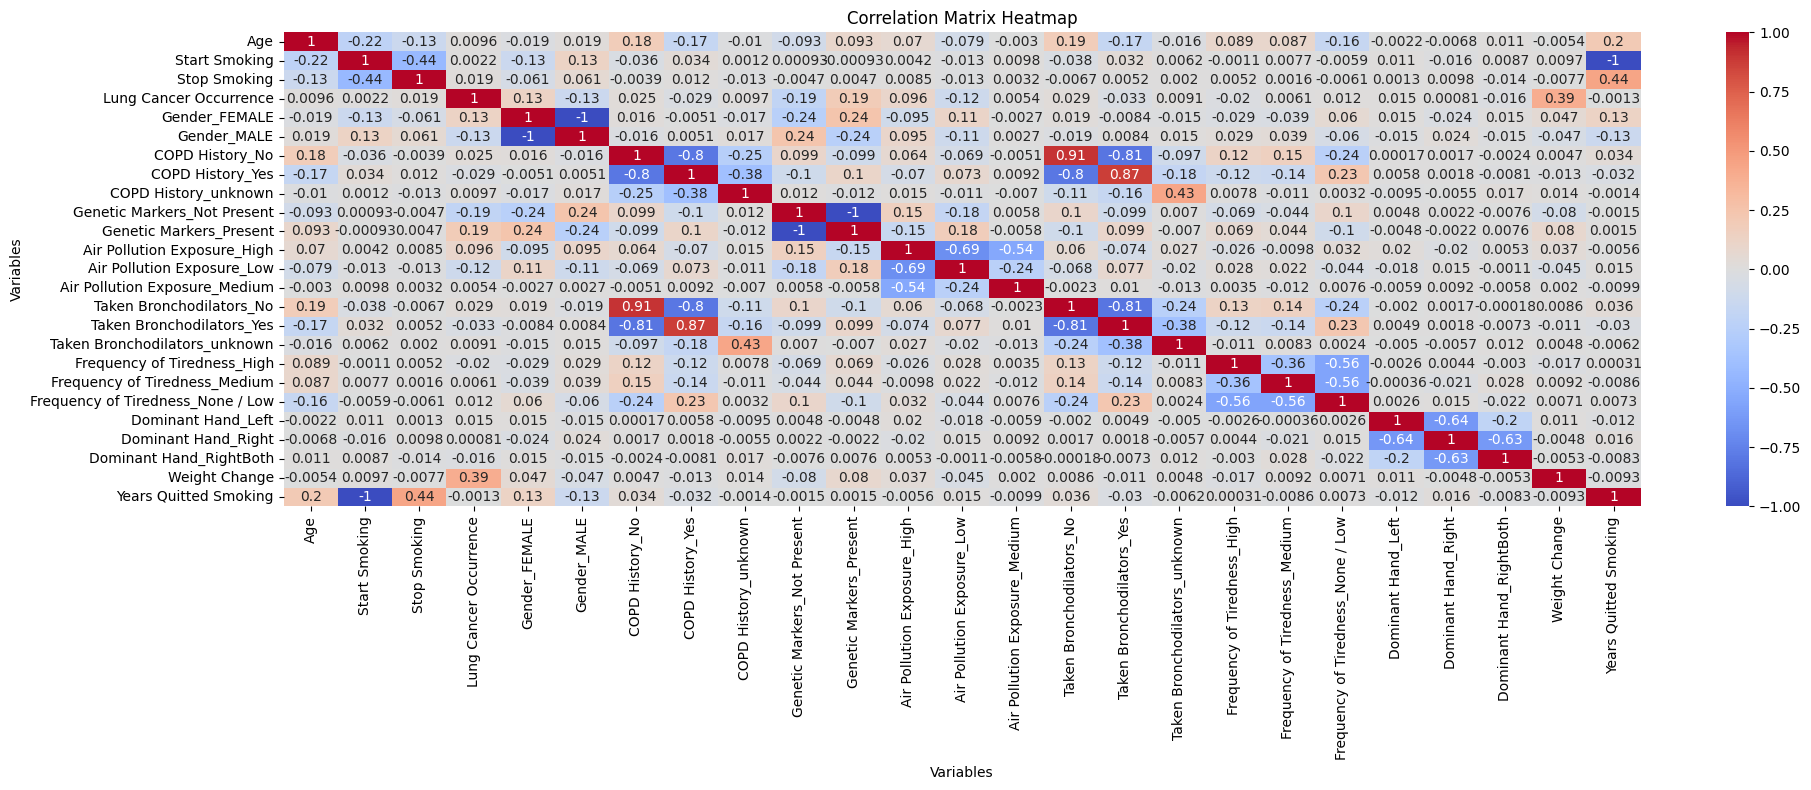

In [180]:
# Create the heatmap
plt.figure(figsize=(20, 8))  # Size of the figure
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Add titles and labels if needed
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.tight_layout()
# Show the plot
plt.show()

It seems that Weight Change, Genetic Markers, Gender and Air Pollution Exposure has the strongest correlation to Lung Cancer Occurence. Most of the variables have very weak correlations.

> Indented block

